# Conjugate Bandits

In this simulation we run *conjugate bandits* against standard *gradient bandits*.

### Importing libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import joblib
import datetime
from tqdm import tqdm

import bandit as bdt
import agents as agt

### Parameters for the bandits

In [2]:
n_arms = 10
mu = 0; sigma = 1

### Parameters for the simulations

In [3]:
n_episodes = 1000
n_trials = 1000

### Parameters for the agents

In [4]:
verbose = False

agents = ['Boltzmann', 'Boltzmann (fixed baseline)', 'Conjugate Boltzmann', 'Conjugate Boltzmann (fixed baseline)']
n_agents = len(agents)
eta = 0.1

### Statistics to collect

In [5]:
optactions = np.zeros((n_agents, n_trials,n_episodes))
totuncertainties = np.zeros((n_agents, n_trials,n_episodes))
epuncertainties = np.zeros((n_agents, n_trials,n_episodes))

### Simulations

In [6]:
for t in tqdm(range(n_trials)):
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_gaussian_reward_distributions(mu, sigma)
    optimal_action = bandit.get_optimal_action()
    
    if(verbose): print('Levers means: {0}'.format(bandit.means))
    if(verbose): print('Optimal action: {0}'.format(optimal_action))
    
    agent = agt.Agent_GradientBoltzmann(bandit, n_arms, eta)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[0,t,e] = stats.multinomial.entropy(1, agent._compute_action_distribution())
        if(action==optimal_action): optactions[0,t,e]=1
        
    agent = agt.Agent_GradientBoltzmann_fixedbaseline(bandit, n_arms, eta, baseline=0)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[1,t,e] = stats.multinomial.entropy(1, agent._compute_action_distribution())
        if(action==optimal_action): optactions[1,t,e]=1
        
    agent = agt.Agent_ConjugateGradientBoltzmann(bandit, n_arms, eta)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[2,t,e] = agent.get_total_uncertainty()
        epuncertainties[2,t,e] = agent.get_epistemic_uncertainty()
        if(action==optimal_action): optactions[2,t,e]=1
        
    agent = agt.Agent_ConjugateGradientBoltzmann_fixedbaseline(bandit, n_arms, eta, baseline=0)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[3,t,e] = agent.get_total_uncertainty()
        epuncertainties[3,t,e] = agent.get_epistemic_uncertainty()
        if(action==optimal_action): optactions[3,t,e]=1

### Saving results

In [9]:
timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
joblib.dump(optactions,'simul1A_optactions_'+timestamp+'.pkl')
joblib.dump(totuncertainties,'simul1A_totuncertainties_'+timestamp+'.pkl')
joblib.dump(epuncertainties,'simul1A_epuncertainties_'+timestamp+'.pkl')

['simul1_epuncertainties_2020_05_24_17_26_47.pkl']

### Plotting results

Text(0.5, 1.0, 'Epistemic uncertainties')

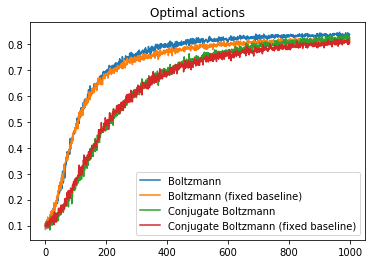

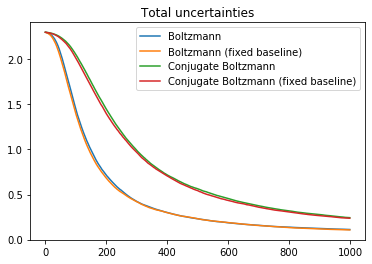

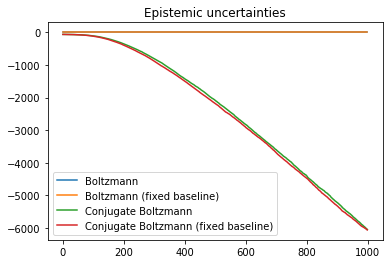

In [8]:
for i in range(n_agents):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,:,:],axis=0)/np.float(n_trials), label=agents[i])
plt.legend()
plt.title('Optimal actions')

plt.figure()
for i in range(n_agents):
    plt.plot(np.arange(n_episodes),np.mean(totuncertainties[i,:,:],axis=0), label=agents[i])
plt.legend()
plt.title('Total uncertainties')

plt.figure()
for i in range(n_agents):
    plt.plot(np.arange(n_episodes),np.mean(epuncertainties[i,:,:],axis=0), label=agents[i])
plt.legend()
plt.title('Epistemic uncertainties')